### 5. Machine Learning

In [1]:
#Librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.model_selection import GridSearchCV

In [2]:
#Rutas
path = 'Data/'

In [3]:
#Cargamos el dataframe
european_football = pd.read_csv(path+'european_football.csv', delimiter=';', 
                                decimal=',')

In [4]:
#Miramos las primeras filas
european_football.head(5)

,Div,Mes,Probabilidad,LocalVisitante,JuegaEuropa,MundialOEurocopa,GanaFavorito
0,P1,1,1.10,1,1,0,1
1,P1,5,1.10,1,1,0,1
2,P1,8,1.15,1,1,0,1
3,P1,9,1.15,1,1,0,1
4,P1,10,1.15,1,1,0,1


In [5]:
#Miramos los tipos de las columnas
european_football.dtypes

Div                  object
Mes                   int64
Probabilidad        float64
LocalVisitante        int64
JuegaEuropa           int64
MundialOEurocopa      int64
GanaFavorito          int64
dtype: object

In [6]:
#Creamos las variables dummies para posteriormente ejecutar algoritmos de machine learning
dummies = pd.get_dummies(european_football, columns=['Div', 'Mes'])

In [7]:
#Comprobamos que todo está correcto
dummies.head()

,Probabilidad,LocalVisitante,JuegaEuropa,MundialOEurocopa,GanaFavorito,Div_D1,Div_E0,Div_F1,Div_I1,Div_P1,...,Mes_3,Mes_4,Mes_5,Mes_6,Mes_7,Mes_8,Mes_9,Mes_10,Mes_11,Mes_12
0,1.10,1,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1.10,1,1,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,1.15,1,1,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,1.15,1,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,1.15,1,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [8]:
#Quitamos la variable "Gana Favorito" para diferenciar entre X e Y.
columns = list(dummies.columns)
columns.remove('GanaFavorito')

In [9]:
columns

['Probabilidad',
 'LocalVisitante',
 'JuegaEuropa',
 'MundialOEurocopa',
 'Div_D1',
 'Div_E0',
 'Div_F1',
 'Div_I1',
 'Div_P1',
 'Div_SP1',
 'Mes_1',
 'Mes_2',
 'Mes_3',
 'Mes_4',
 'Mes_5',
 'Mes_6',
 'Mes_7',
 'Mes_8',
 'Mes_9',
 'Mes_10',
 'Mes_11',
 'Mes_12']

### X, y, test & Train

In [10]:
X = dummies[columns].values

In [11]:
y = dummies["GanaFavorito"] #Hace 0 y 1

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### K NEAREST NEIGHBORS

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
#Creamos el algoritmo
clf = KNeighborsClassifier(n_neighbors=150)

In [16]:
clf.fit(X, y) #entrenamos

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=150, p=2,
           weights='uniform')

In [17]:
#Entrenamos el train
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=150, p=2,
           weights='uniform')

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
#Observamos el accuracy de nuestro modelo
accuracy_score(y_test, clf.predict(X_test))

0.578702570379437

In [20]:
#Miramos la predicción del X_test
clf.predict(X_test)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [21]:
#Vamos a ver en un gráfico la precision - recall score

Average precision-recall score: 0.63


Text(0.5,1,'2-class Precision-Recall curve: AP=0.63')

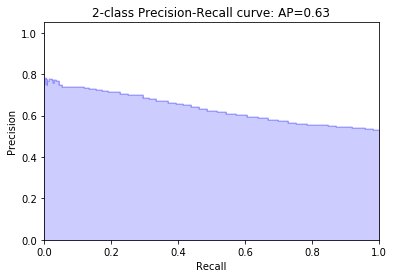

In [22]:
from sklearn.metrics import precision_recall_curve

y_score = clf.predict_proba(X_test)[:,1]
precision, recall, _ = precision_recall_curve(y_test, y_score)
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

In [23]:
#Curve ROC

In [24]:
from sklearn.metrics import roc_curve, auc

In [25]:
actual = y_test
predictions = clf.predict(X_test)

In [26]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)

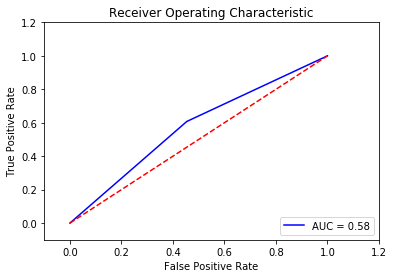

In [27]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [28]:
#Crossval score: para reorganizar y hacer el accuracy varias veces, así será más acertado el accuracy

In [29]:
from sklearn.model_selection import cross_val_score

In [30]:
mean_accuracy = cross_val_score(clf,X,y, cv=10, scoring='accuracy')

In [31]:
mean_accuracy.mean()

0.5751041375345038

(array([1., 1., 0., 1., 1., 1., 2., 1., 0., 2.]),
 array([0.53446419, 0.54188499, 0.5493058 , 0.5567266 , 0.56414741,
        0.57156821, 0.57898902, 0.58640982, 0.59383062, 0.60125143,
        0.60867223]),
 <a list of 10 Patch objects>)

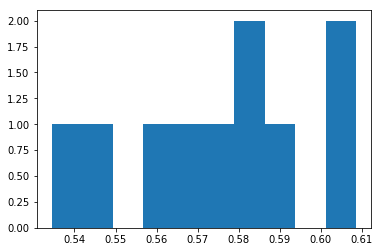

In [32]:
plt.hist(mean_accuracy) #Para ver los distintos accuracies que tiene el modelo

## Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
#Creamos el estimador y lo entrenamos
clfdt = DecisionTreeClassifier(max_depth=50)

In [35]:
clfdt.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=50,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [36]:
#Miramos el accuracy
accuracy_score(y_test, clfdt.predict(X_test))

0.7135046919624644

Average precision-recall score: 0.83


Text(0.5,1,'2-class Precision-Recall curve: AP=0.83')

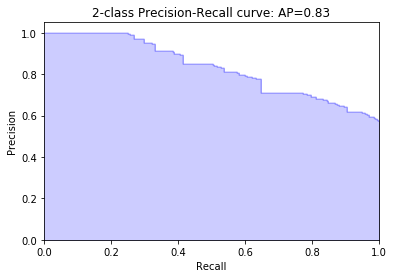

In [37]:
from sklearn.metrics import precision_recall_curve

y_score = clfdt.predict_proba(X_test)[:,1]
precision, recall, _ = precision_recall_curve(y_test, y_score)
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

In [38]:
actual = y_test
predictions = clfdt.predict(X_test)

In [39]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)

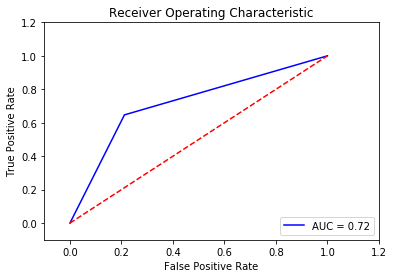

In [40]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Debido a que esta técnica de Machine Learning tenemos mejores datos que el resto, vamos a ver si nuestro modelo tiene overfitting y si lo tiene lo ajustaremos

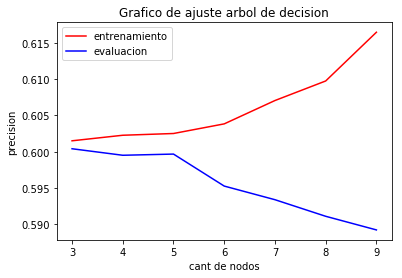

In [41]:
# Grafico de ajuste del árbol de decisión
train_prec =  []
eval_prec = []
max_deep_list = list(range(3, 10))

for deep in max_deep_list:
    arbol3 = DecisionTreeClassifier(criterion='entropy', max_depth=deep)
    arbol3.fit(X_train, y_train)
    train_prec.append(arbol3.score(X_train, y_train))
    eval_prec.append(arbol3.score(X_test, y_test))

# graficar los resultados.
plt.plot(max_deep_list, train_prec, color='r', label='entrenamiento')
plt.plot(max_deep_list, eval_prec, color='b', label='evaluacion')
plt.title('Grafico de ajuste arbol de decision')
plt.legend()
plt.ylabel('precision')
plt.xlabel('cant de nodos')
plt.show()

In [42]:
#Para buscar cuales son los mejores parámetros del modelo.

In [43]:
clfdt1 =GridSearchCV(estimator=DecisionTreeClassifier(max_depth = 50),
                     param_grid={'max_depth': np.arange(1,10)} ,
                     scoring='accuracy', cv=5, n_jobs=-1)

In [44]:
clfdt1.fit(X,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=50,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [45]:
#Estos serán los mejores parametros del modelo
clfdt1.best_params_

{'max_depth': 3}

In [46]:
#El máximo score del modelo será:
clfdt1.best_score_

0.6004685480396381

In [47]:
clfdt1.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [48]:
#Miramos la precisión en el test
mejor_modelo = clfdt1.best_estimator_
mejor_modelo.fit(X_train, y_train)
print('Precisión: {0:.3f}'.format(mejor_modelo.score(X_test, y_test)))

Precisión: 0.600


## Support Vector Machines

In [49]:
from sklearn.svm import SVC

In [50]:
#Creamos el modelo y lo entrenamos
clfSVM = SVC(kernel ='linear', degree=5)

In [51]:
clfSVM.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=5, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [52]:
#Miramos el accuracy
accuracy_score(y_test, clfSVM.predict(X_test))

0.5996736026111791

In [53]:
clf = SVC(kernel='linear', C=0.1)
clf.fit(X,y)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [54]:
a = cross_val_score(clf,X,y, cv=10, scoring='accuracy')
a.mean()

0.5996363053543068

### OTROS MODELOS

In [55]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [56]:
#Agrupamos los modelos
models = []
models.append(('LR', LogisticRegression()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))

In [57]:
#Vamos a evaluar los modelos

In [58]:
#ACCURACY
results = []
names = []
seed = 0.42
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.600297 (0.015192)
RF: 0.544994 (0.012193)
NB: 0.557132 (0.017153)


In [59]:
#RECALL
results = []
names = []
seed = 0.42
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='recall')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.648696 (0.018131)
RF: 0.550591 (0.018023)
NB: 0.852452 (0.038703)


In [60]:
#AVERAGE PRECISION
results = []
names = []
seed = 0.42
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='average_precision')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.674732 (0.011242)
RF: 0.596838 (0.010039)
NB: 0.660622 (0.012302)


In [61]:
#F1
results = []
names = []
seed = 0.42
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.630954 (0.013918)
RF: 0.560206 (0.010345)
NB: 0.669646 (0.007630)


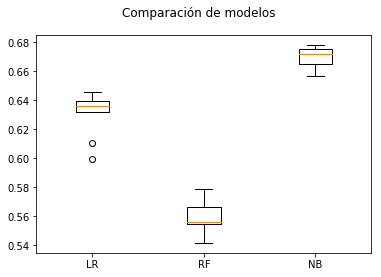

In [62]:
# Comparamos los modelos gráficamente
fig = plt.figure()
fig.suptitle('Comparación de modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()